Install `xlrd` for reading the `xls` file

In [ ]:
%conda install xlrd==2.0.1

Set the path to the `xls` file

In [2]:
training_file = "TrainDataset2024.xls"
# training_file = "/kaggle/input/dataset/TrainDataset2024.xls"

Import libraries

In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

Read `xls` file

In [4]:
# read data from xls file
all_df = pd.read_excel(io=training_file)

Store the data to variables (Just focus on the classification task at this moment)

In [5]:
# features
X = all_df.drop(columns=all_df.columns[:3])
# targets
Y = all_df.iloc[:,1]
# data without id
df = all_df.drop(columns=all_df.columns[0])

Drop the rows if the `pCR (outcome)` is 999 (i.e. missing data)

In [6]:
no_999 = df.drop(labels=df[df["pCR (outcome)"]==999].index).drop(columns=["RelapseFreeSurvival (outcome)"])

In [7]:
no_999_all = df.drop(labels=df[df.isin([999]).any(axis=1)].index)

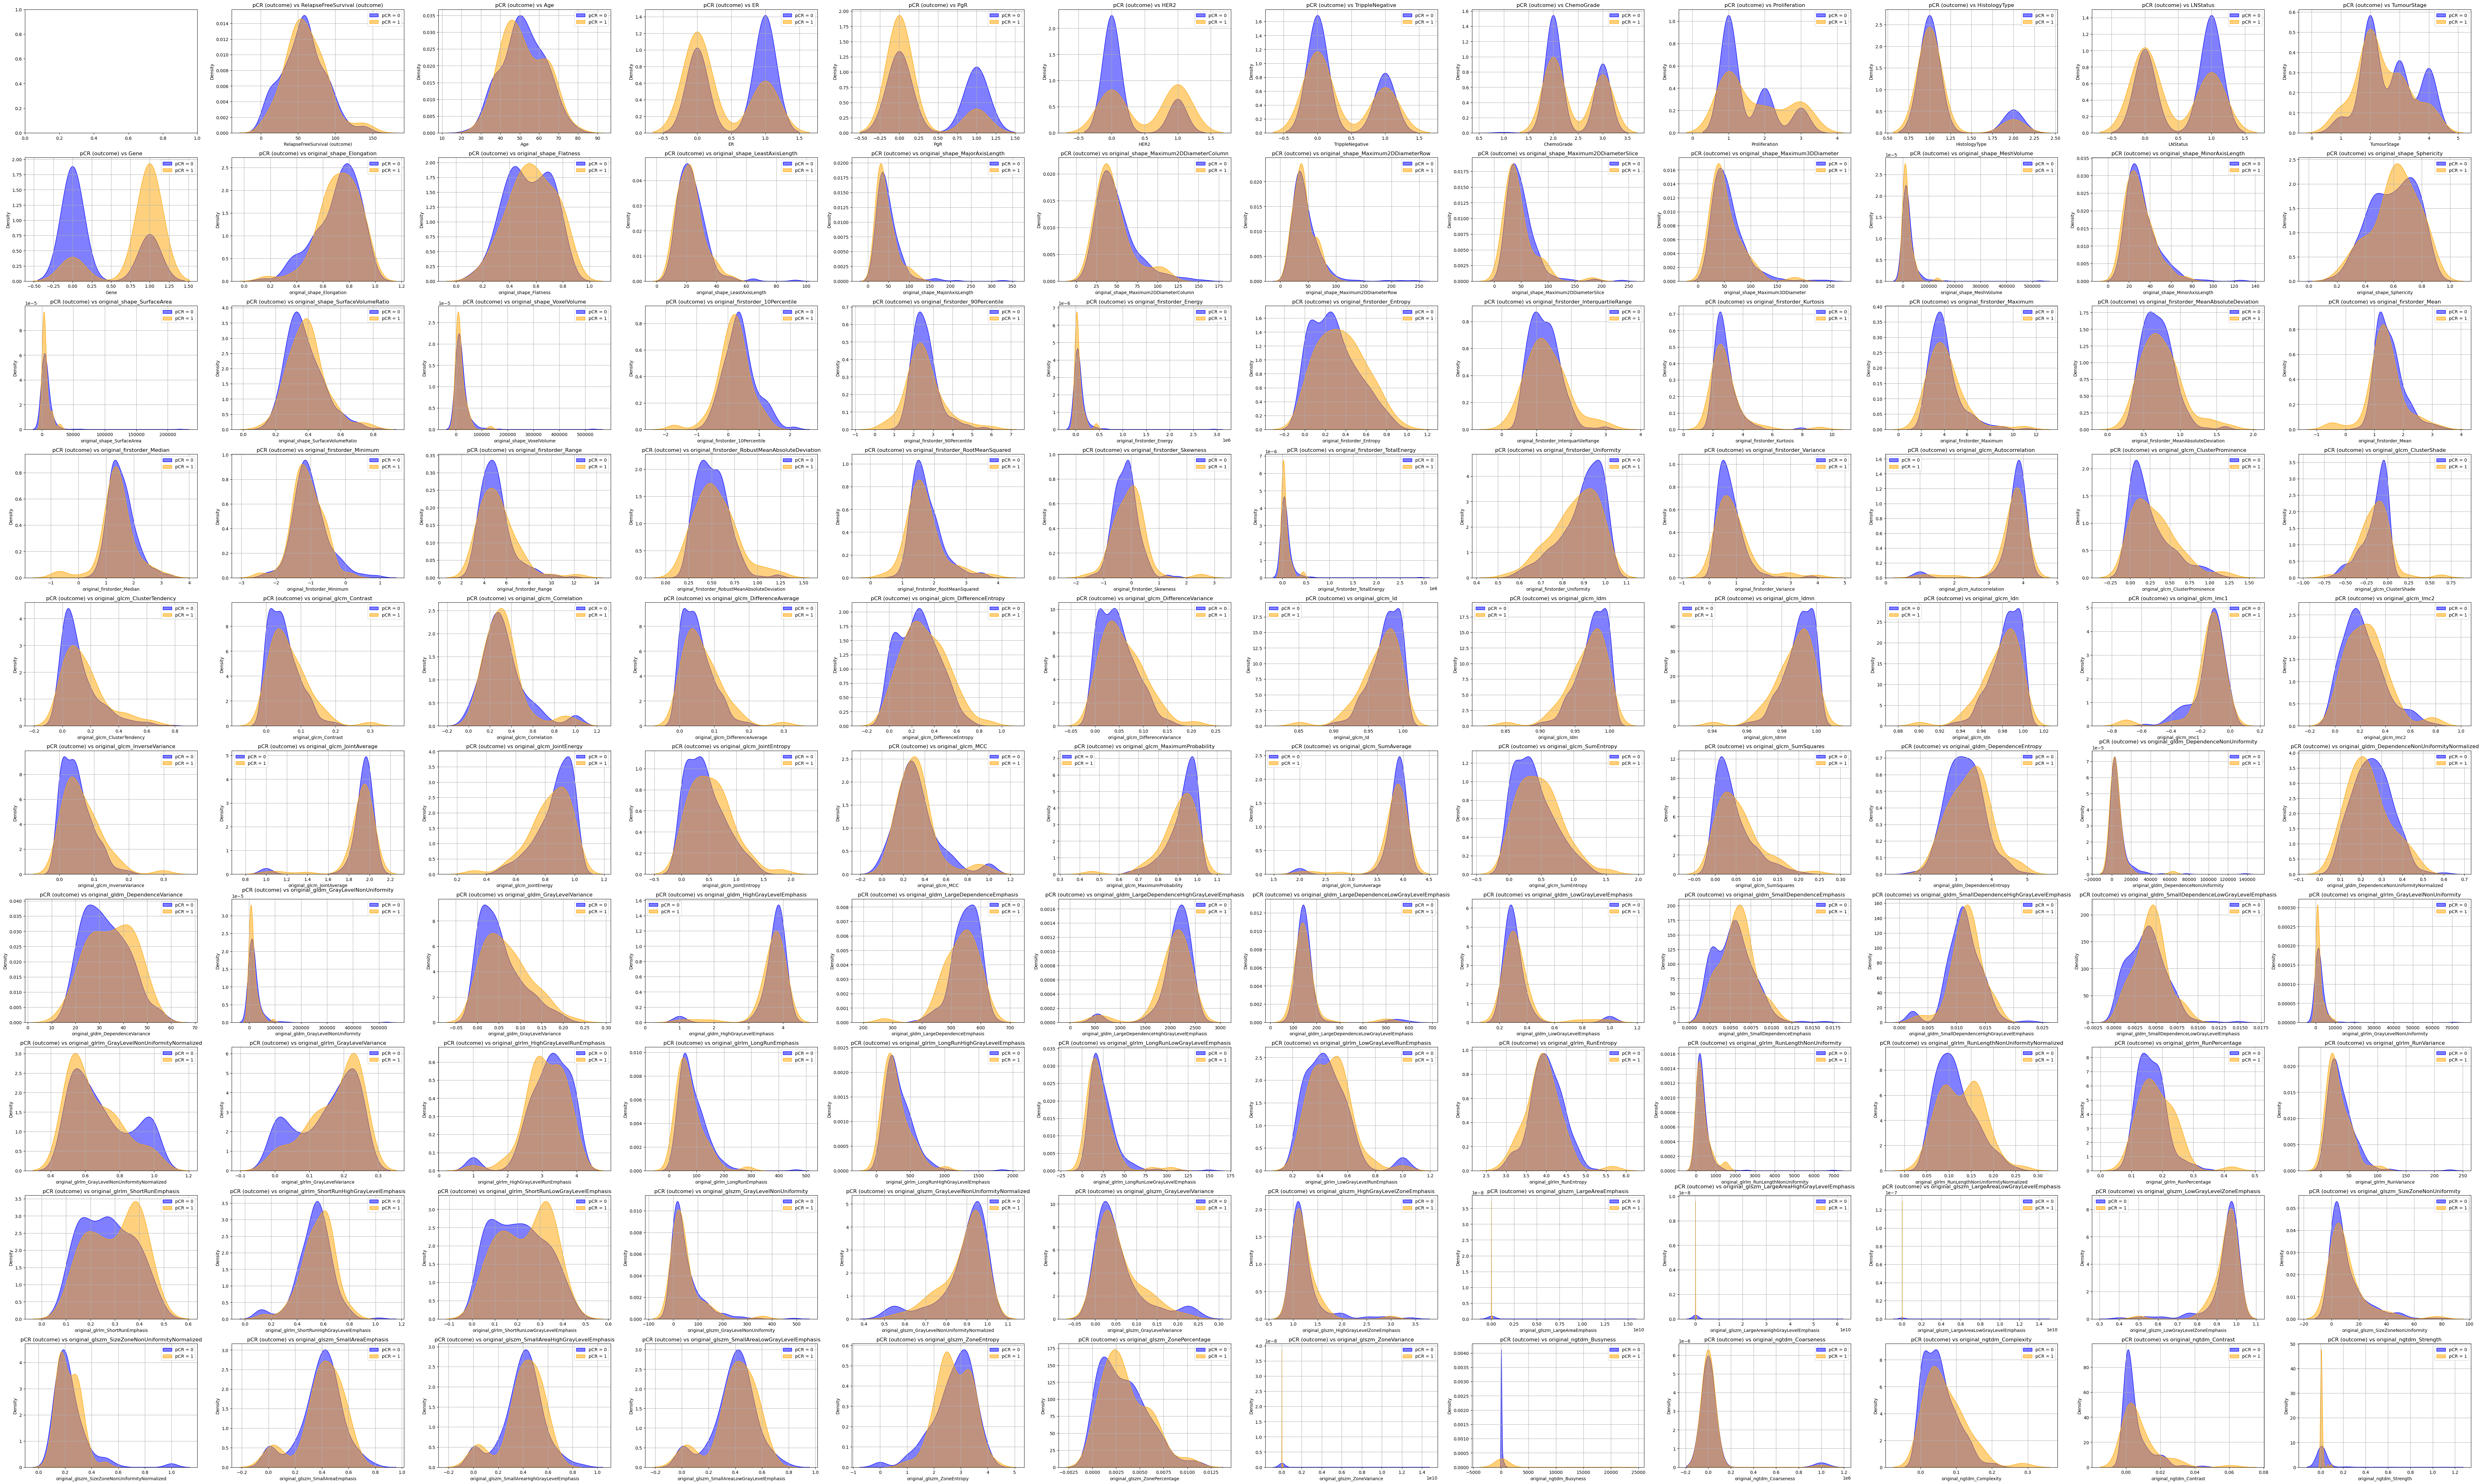

In [12]:
# suppress warning
warnings.filterwarnings("ignore", category=FutureWarning)

target_feature = "pCR (outcome)"

fig, ax = plt.subplots(10, 12, figsize=(100, 60))

ax = ax.flatten()

# Loop through each feature in the DataFrame
for i, feature in enumerate(no_999_all.columns):
    if feature != target_feature:
        # Plot the KDE for each condition of the target feature
        sns.kdeplot(data=no_999_all[no_999_all[target_feature] == 0], 
                     x=feature, ax=ax[i], label='pCR = 0', fill=True, color='blue', alpha=0.5)
        sns.kdeplot(data=no_999_all[no_999_all[target_feature] == 1], 
                     x=feature, ax=ax[i], label='pCR = 1', fill=True, color='orange', alpha=0.5)
        
        ax[i].set_title(f'{target_feature} vs {feature}')
        ax[i].set_xlabel(feature)
        ax[i].set_ylabel('Density')
        ax[i].legend()
        ax[i].grid()

# Reset warning filter
warnings.resetwarnings()

/home/ubuntu/miniconda3/envs/KaggleOct2024/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: title={'center': 'Breast Cancer Feature Correlation'}>

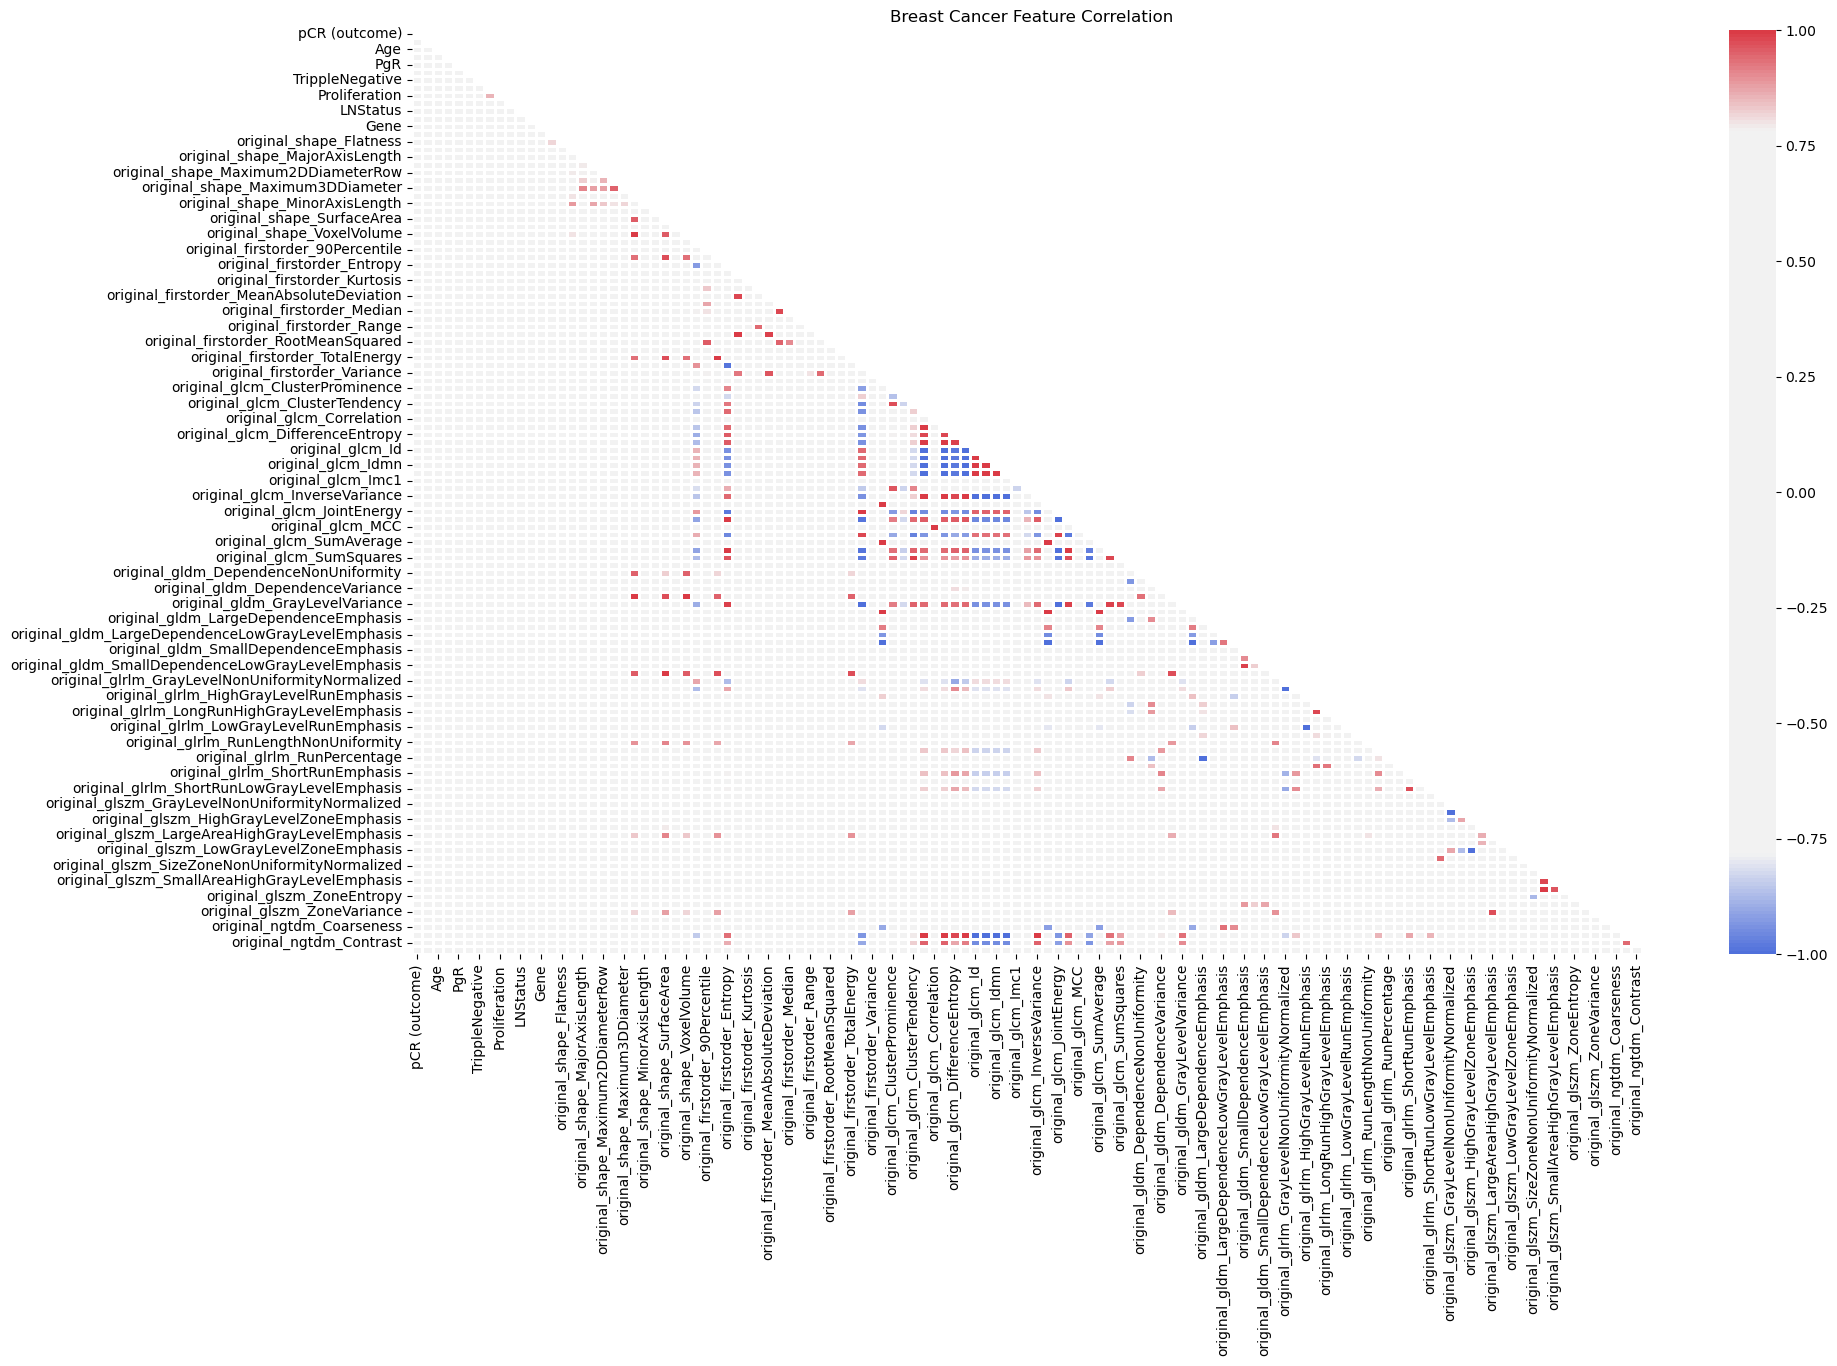

In [14]:
corr_mat = no_999_all.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title("Breast Cancer Feature Correlation")

# Generate a custom diverging colourmap
cmap = sns.diverging_palette(260, 10, sep=200, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_mat, vmin=-1, vmax=1, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1)